In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Here the 784 represents the pixel values, i.e. 28*28 and the label column stores the number.**

In [5]:
df.shape

(42000, 785)

In [6]:
import matplotlib.pyplot as plt

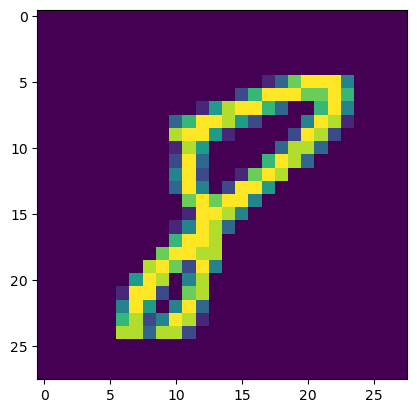

In [7]:
plt.imshow(df.iloc[18306, 1:].values.reshape(28,28))

# **Without PCA**

In [8]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# df.iloc[rows, columns]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
X_train.shape

(33600, 784)

In [11]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

13.140221118927002


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

# **Using PCA**

In [17]:
# step 1: mean centering

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# next step, we will use PCA directly from sklearn library

from sklearn.decomposition import PCA
pca = PCA(n_components = None)

**Here n_components determine the number of principal components we want after PCA. if we mention 'None', the number of PC will remain same as the number of columns originally**

In [20]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [21]:
X_train.shape

(33600, 784)

**Here the shape reamins 784 as we passed NONE in n_components while passing PCA function.**

In [22]:
pca2 = PCA(n_components =100)

In [23]:
X_train_trf = pca2.fit_transform(X_train)
X_test_trf = pca2.transform(X_test)

In [24]:
X_train_trf.shape

(33600, 100)

**as we can see now, the number of columns has reduced to 100**

In [25]:
knn = KNeighborsClassifier()

In [26]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(X_test_trf)

In [28]:
accuracy_score(y_test, y_pred)

0.9541666666666667

In [31]:
for i in range(1, 785):
    pca = PCA(n_components =i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf, y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test, y_pred))
    
    # here we will get accuracy score for each value of i

0.25857142857142856
0.32345238095238094
0.5097619047619047
0.6660714285714285
0.7378571428571429
0.8226190476190476
0.8432142857142857
0.8716666666666667
0.886547619047619
0.9063095238095238
0.9116666666666666
0.9179761904761905
0.9279761904761905
0.9346428571428571
0.9394047619047619
0.9378571428571428
0.9402380952380952
0.9411904761904762
0.9427380952380953
0.9444047619047619


KeyboardInterrupt: 

# **PCA Visualization part**

In [32]:
# transforming to a 2D coordinate system, 2 cols

pca = PCA(n_components =2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [33]:
X_train_trf

array([[-2.71866002, -0.48919717],
       [-0.67695654, -6.75435835],
       [-3.03322847,  6.50966423],
       ...,
       [ 2.14888293,  0.78022969],
       [ 1.05953467,  0.94862763],
       [17.70260192,  1.9614147 ]])

In [34]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:,0],
                 y = X_train_trf[:,1],
                 color = y_train_trf,
                 color_discrete_sequence = px.colors.qualitative.G10)

fig.show()

In [35]:
# transforming into 3-D, 3 cols

pca = PCA(n_components =3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [36]:
X_train_trf

array([[-2.71860597, -0.49007145,  1.1357971 ],
       [-0.67697536, -6.7536387 , -2.33583246],
       [-3.03324114,  6.50983799,  7.49180596],
       ...,
       [ 2.14883268,  0.78084924, -0.7479183 ],
       [ 1.05960249,  0.94742492,  3.95002115],
       [17.70261204,  1.96168205, -4.94248077]])

In [37]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x = X_train_trf[:,0], y= X_train_trf[:,1] , z= X_train_trf[:,2],
                   color = y_train_trf)

fig.update_layout(
    margin =dict(l=20, r=20, t=20, b=20)
)

fig.show()

**Enjoy the above visualization**

# **Study PCA attributes**

In [38]:
pca.explained_variance_
# these explained variance are the eigen values

array([40.67111198, 29.17023398, 26.7445957 ])

In [39]:
pca.components_

# this will return the eigen vectors

array([[ 1.00000000e+00,  3.13890031e-10, -1.01024637e-09, ...,
        -1.99642075e-33, -4.62066302e-34, -8.65542724e-35],
       [-2.82034923e-10,  1.00000000e+00,  2.14486131e-08, ...,
        -2.44370066e-33,  6.23740398e-34,  1.73175045e-35],
       [ 8.79528060e-10, -2.06531308e-08,  9.99999996e-01, ...,
         1.53302676e-33, -2.13154229e-34, -3.49490590e-34]])

In [40]:
pca.components_.shape

(3, 784)

In [42]:
# to get percentage, to find optimal number of principal components

pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

**multiply into 100 to get percent**

# Perform PCA again to find the optimal number of components

In [43]:

pca = PCA(n_components =None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [45]:
pca.explained_variance_.shape

(784,)

In [46]:
pca.components_.shape

(784, 784)

In [48]:
np.cumsum(pca.explained_variance_ratio_)

# np.cumsum  - cumulative sum. har element ka har doorse, teesre, chauthe etc aise har element ke sath sum dega
# pehla 1, second 1+2, third 1+2+3

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

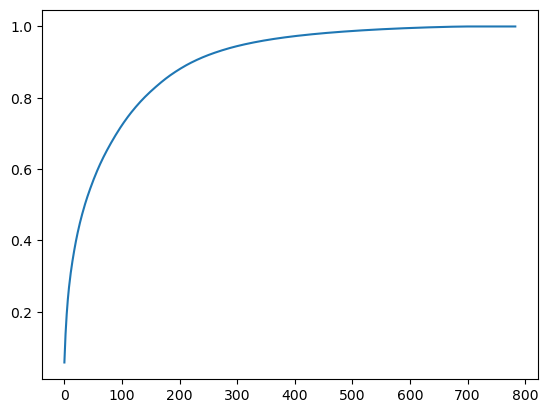

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

**this graph will depict ki kitne values lene pr hum 90% variance ka target achieve kr paa rhe hai.**